In [ ]:
import pandas as pd

# Load the dataset (assuming the Mushroom dataset is in a CSV file)
df = pd.read_csv('mushroom.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for general information (data types, null values, etc.)
print(df.info())

# Get a summa


   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

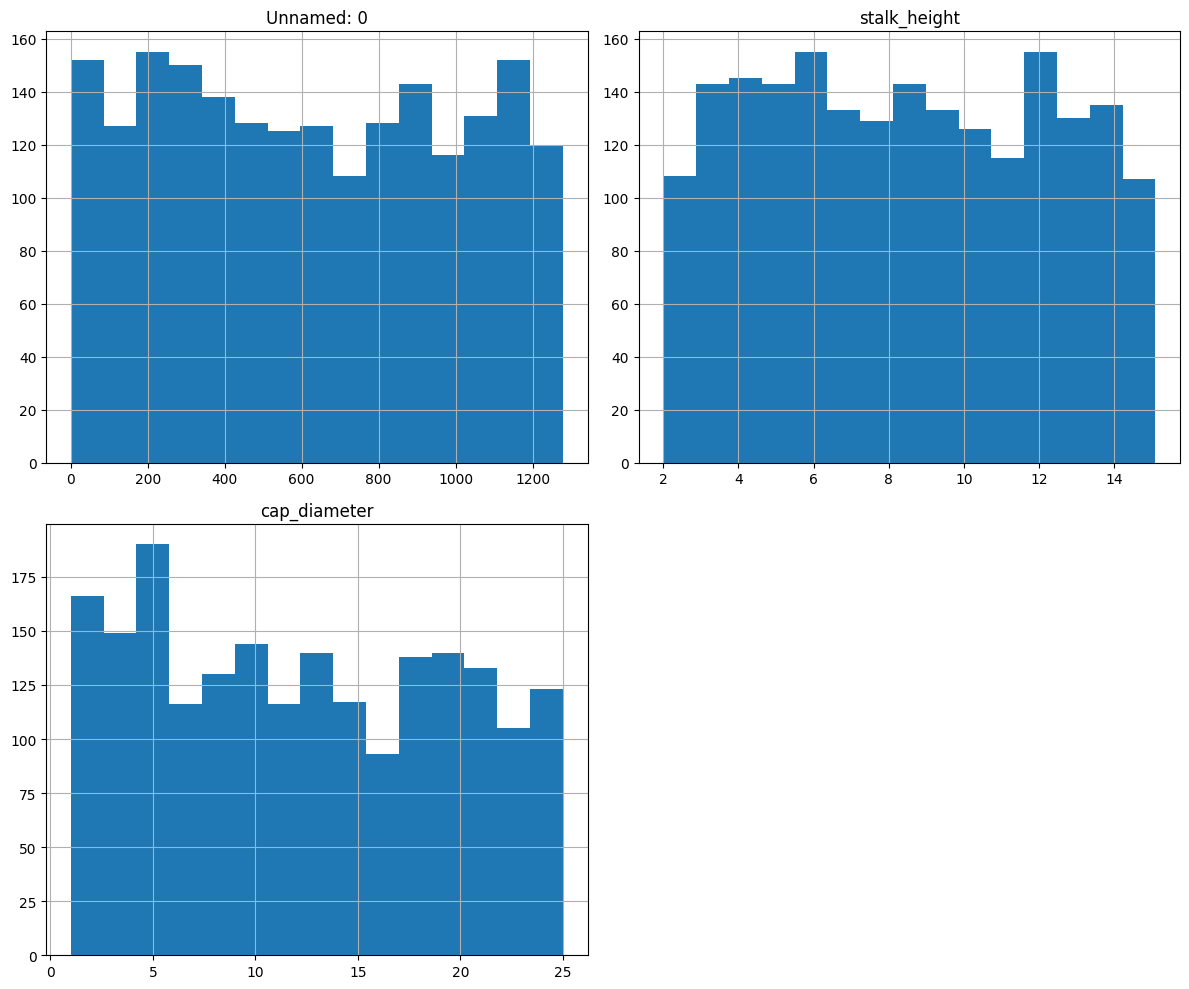

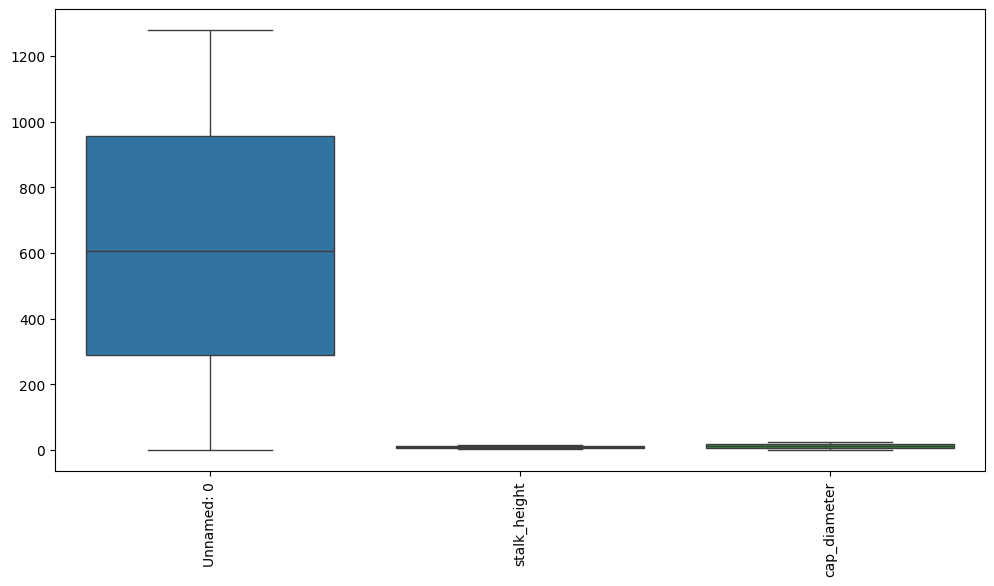

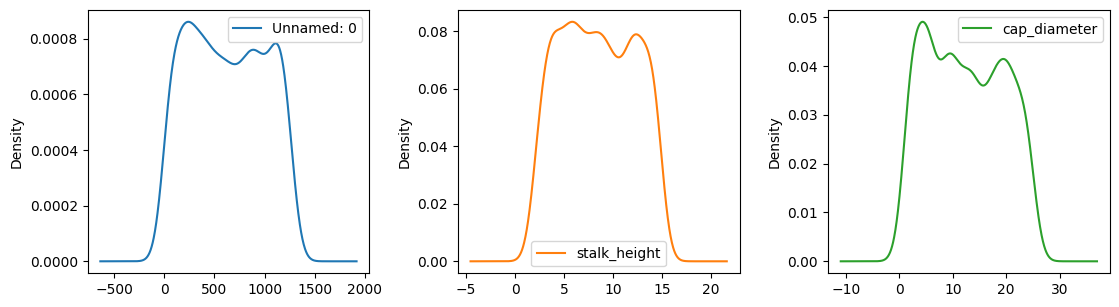

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for all features (if numerical)
df.hist(figsize=(12, 10), bins=15)
plt.tight_layout()
plt.show()

# Boxplot to detect outliers (if numerical)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Density plot for each feature
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(15, 12))
plt.tight_layout()
plt.show()


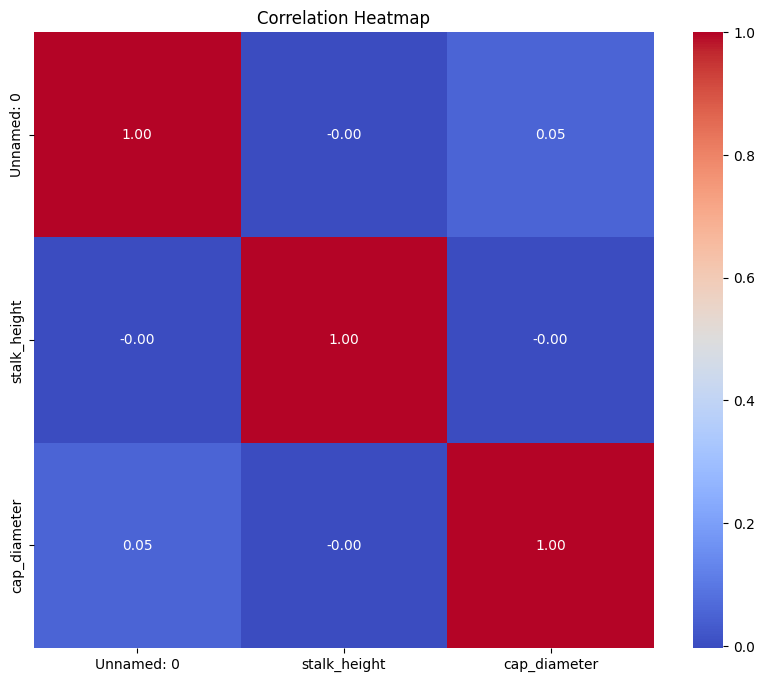

In [ ]:
# Check correlation between numerical features (if any numerical columns exist)
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Encode categorical columns using LabelEncoder or One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each column
df_encoded = df.apply(encoder.fit_transform)

# Display the first few rows of the encoded dataset
print(df_encoded.head())


   Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0         889          4            2          7        0     1   
1         786          4            0          6        0     1   
2         246          3            1          5        1     4   
3         221          0            2          4        1     3   
4         630          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3         

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target (class) and features
X = df_encoded.drop('class', axis=1)  # Dropping 'class' column as it is the target
y = df_encoded['class']  # 'class' is the target variable

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate performance using appropriate metrics
print("SVM Performance (Linear Kernel):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")


SVM Performance (Linear Kernel):
Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0000
F1-Score: 0.8006


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy')

# Fit grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")


In [ ]:
# SVM with different kernels for comparison
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    print(f"\nSVM Performance ({kernel.capitalize()} Kernel):")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

<ipython-input-5-95931c6fc73f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=df, palette="viridis")


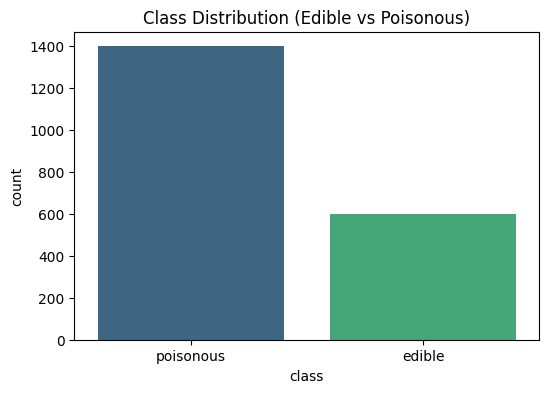

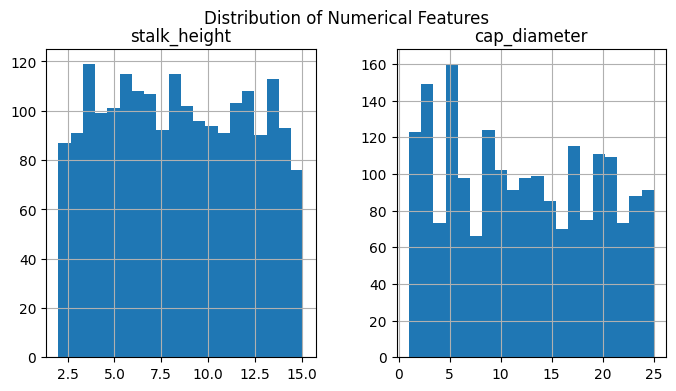

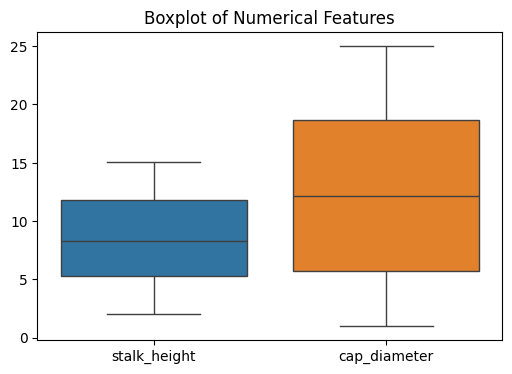

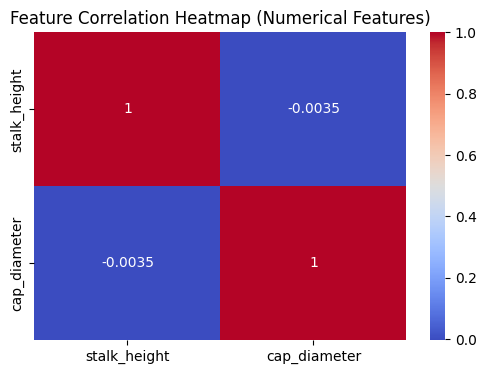

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.05      0.10       133
           1       0.68      1.00      0.81       267

    accuracy                           0.69       400
   macro avg       0.84      0.53      0.45       400
weighted avg       0.79      0.69      0.57       400



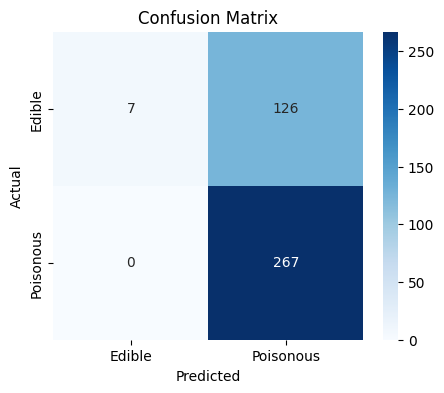

Accuracy: 0.6850
Precision: 0.6794
Recall: 1.0000
F1 Score: 0.8091
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Optimized Model Performance:
Accuracy: 0.8850
Precision: 0.8530
Recall: 1.0000
F1 Score: 0.9207


<ipython-input-5-95931c6fc73f>:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], palette="viridis")


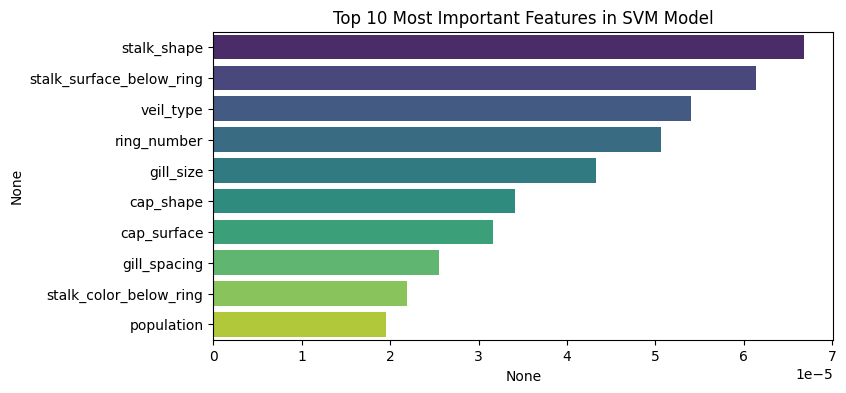

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ================================
# 🚀 1. LOAD & EXPLORE THE DATA
# ================================

# Load dataset
df = pd.read_csv("mushroom.csv")

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True)

# Display dataset info
print(df.info())

# Check class distribution
plt.figure(figsize=(6,4))
sns.countplot(x="class", data=df, palette="viridis")
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

# Visualize numerical feature distributions
df[["stalk_height", "cap_diameter"]].hist(figsize=(8,4), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Boxplot for outliers
plt.figure(figsize=(6,4))
sns.boxplot(data=df[["stalk_height", "cap_diameter"]])
plt.title("Boxplot of Numerical Features")
plt.show()

# Heatmap for correlations
# Selecting numerical features
numerical_features = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_features]

plt.figure(figsize=(6, 4))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")  # Correlation on numerical features only
plt.title("Feature Correlation Heatmap (Numerical Features)")
plt.show()

# ================================
# 🚀 2. DATA PREPROCESSING
# ================================

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store for inverse transformation if needed

# Define features and target
X = df.drop("class", axis=1)
y = df["class"]

# Feature scaling (for numerical features)
scaler = StandardScaler()
X[["stalk_height", "cap_diameter"]] = scaler.fit_transform(X[["stalk_height", "cap_diameter"]])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ================================
# 🚀 3. TRAINING SVM CLASSIFIER
# ================================

# Train a basic SVM classifier with RBF kernel
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# ================================
# 🚀 4. MODEL EVALUATION
# ================================

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# ================================
# 🚀 5. HYPERPARAMETER TUNING
# ================================

# Define parameter grid for tuning
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto", 0.1, 1],
    "kernel": ["linear", "rbf", "poly"]
}

# Perform Grid Search with Parallelization and Reduced CV Folds
grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring="accuracy", verbose=1, n_jobs=-1)  # Reduced cv to 3
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Print optimized evaluation metrics
print("\nOptimized Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")

# ================================
# 🚀 6. FEATURE SELECTION
# ================================

# Find feature importance using SVM coefficients (for linear kernel)
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(abs(svm_linear.coef_[0]), index=X.columns).sort_values(ascending=False)

# Plot top features
plt.figure(figsize=(8,4))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], palette="viridis")
plt.title("Top 10 Most Important Features in SVM Model")
plt.show()

